<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning-translated/blob/main/13_recommender_systems/1_one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

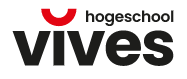<br>


**MACHINE LEARNING FUNDAMENTALS**<br>Andy Louwyck

---



---



## One-hot encoding

### Explanation

Convert **categorical variables** to numeric values:
- **ordinal** (order):
- e.g. test scores {A, B, C, D, E, F}
- become integers {5, 4, 3, 2, 1, 0}
- OK because order remains
- **nominal** (no order):
- e.g. classes {cat, dog, rabbit}
- become integers {0, 1, 2}
- not OK, because 2 > 1 > 0, and order is not allowed!

Possible solution is to apply **one-hot encoding**:
- classes {cat, dog, rabbit}
- are converted to {100, 010, 001}

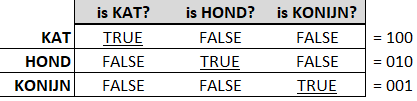

**ONE-HOT ENCODING:**
- TRANSFORMATION of nominal data
- during PREPROCESSING phase
- to increase performance of algorithms
- = DUMMY variables in statistics

**HOW?**
- suppose: K classes
- number classes from 0 to K-1
- class i:
- array with all zeros
- except: i-th element = 1

**ONE-COLD ENCODING** also exists:
- same as one-hot encoding, but zeros become ones and one becomes zero
- class i:
- array with all ones
- except: i-th element = 0

### Code it yourself

Write a function `one_hot_encoder()` that encodes one class from a list of K classes using one-hot encoding

In [1]:
import numpy as np

def one_hot_encoder(value, values):
    # value is the class value
    # values ​​is the list of class values
    # returns numpy array with the one-hot code of the given value
    k = len(values)
    i = values.index(value)
    c = np.zeros(k)
    c[i] = 1
    return c

Test on `['cat', 'dog', 'rabbit']`:

In [2]:
from random import shuffle

classes = ['cat', 'dog', 'rabbit']
values ​​= classes.copy()
shuffle(values)

for value in values:
    print(value, one_hot_encoder(value, classes), sep='\t')

konijn	[0. 0. 1.]
kat	[1. 0. 0.]
hond	[0. 1. 0.]


Also write a function `one_cold_encoder()` that converts one class from a list of K classes using one-cold encoding

In [3]:
def one_cold_encoder(value, values):
    # value is the class value
    # values ​​is the list of class values
    # returns numpy array with the one-cold code of the given value
    k = len(values)
    i = values.index(value)
    c = np.ones(k)
    c[i] = 0
    return c

Test on `['apple', 'pear', 'banana', 'cherry', 'kiwi']`:

In [4]:
classes = ['apple', 'pear', 'banana', 'cherry', 'kiwi'] values ​​= classes.copy() shuffle(values) for value in values: print(value, one_cold_encoder(value, classes), sep='\t')

kiwi	[1. 1. 1. 1. 0.]
peer	[1. 0. 1. 1. 1.]
banaan	[1. 1. 0. 1. 1.]
kers	[1. 1. 1. 0. 1.]
appel	[0. 1. 1. 1. 1.]


### Pandas

Pandas has a function `get_dummies()`:

In [5]:
import pandas as pd

df = pd.DataFrame({'name': ['Jan', 'Piet', 'Joris', 'Korneel', 'Jos'],
'fruit': ['banana', 'apple', 'pear', 'apple', 'banana']})
df

,naam,fruit
0,Jan,banaan
1,Piet,appel
2,Joris,peer
3,Korneel,appel
4,Jos,banaan


In [6]:
pd.get_dummies(df, columns=['fruit'], prefix='', prefix_sep='') # prefix=None will add prefix 'fruit_' to the column names

,naam,appel,banaan,peer
0,Jan,False,True,False
1,Piet,True,False,False
2,Joris,False,False,True
3,Korneel,True,False,False
4,Jos,False,True,False


### Scikit-Learn

Scikit-Learn has the classes `OneHotEncoder` and `LabelBinarizer` in module `preprocessing`:

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [8]:
encoder = OneHotEncoder()
c = encoder.fit_transform(df[['fruit']]) # input must be 2D, hence double square brackets!
c.toarray() # output c is sparse matrix -> convert to numpy array

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [9]:
LabelBinarizer().fit_transform(df.fruit) # use chaining instead of assigning LabelBinarizer object to variable

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

### `mlxtend`

In the topic about association rule learning we will use the Python machine learning library `mlxtend`: http://rasbt.github.io/mlxtend/.

Library `mlxtend` has a function `one_hot()`, but it only accepts a list or array of integers as input:

In [10]:
from mlxtend.preprocessing import one_hot

First convert the classes to integers using class `LabelEncoder` from `sklearn.preprocessing`:

In [11]:
from sklearn.preprocessing import LabelEncoder y = LabelEncoder().fit_transform(df.fruit.values) y

array([1, 0, 2, 0, 1])

In [12]:
one_hot(y) # default dtype is float

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Convert to one-cold:

In [13]:
(~one_hot(y, dtype=bool)).astype(int)

array([[1, 0, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 1, 1],
       [1, 0, 1]])

## Scikit-Learn Encoders

We've seen several ways to transform categorical variables in the course, but what's the difference between all those different encoders in Scikit-Learn?

- `OrdinalEncoder`
- `OneHotEncoder`
- `LabelEncoder`
- `LabelBinarizer`

Let's first import these classes from the `preprocessing` module:

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer

According to the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) the first two should be used for features `X`.

The `OrdinalEncoder` is basically meant for ordinal variables, which means that the order is important. You can also specify that order when instantiating the class.

We define a variable or feature 'temperature' as an example with three categories: cold, warm and hot:

In [21]:
df = pd.DataFrame(dict(temperature=['hot', 'cold', 'warm', 'hot', 'warm', 'cold']))
df

,temperature
0,hot
1,cold
2,warm
3,hot
4,warm
5,cold


We can specify the order via the input parameter `categories`:

In [23]:
OrdinalEncoder(categories=[['cold', 'warm', 'hot']]).fit_transform(df)

array([[2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.]])

Indeed, we see that cold is mapped to 0, warm to 1, and hot to 2.

If the variable is not ordinal but nominal, then we better use the `OneHotEncoder`:

In [26]:
OneHotEncoder(categories=[['cold', 'warm', 'hot']]).fit_transform(df).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Here too we have specified the order via `categories`, and the `fit` method does take this into account, but with one-hot encoding this order does not play a role.

According to the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets) the last two classes should be used to convert the labels into a target.

The `LabelEncoder` can be seen as the equivalent of the `OrdinalEncoder`, but intended for labels. This means that only 1 column `y` is passed, which is preferably a 1D vector.

In [29]:
LabelEncoder().fit_transform(df['temperature']) # df['temperature'] is 1D series!

array([1, 0, 2, 1, 2, 0])

The order doesn't matter here!

Finally, the `LabelBinarizer` is the equivalent of the `OneHotEncoder`, but intended for a target vector `y`:

In [30]:
LabelBinarizer().fit_transform(df['temperature']) # df['temperature'] is 1D series!

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

Here the order doesn't matter at all.

Is it a disaster if you now use the `OneHotEncoder` to convert a multi-class target `y`? Of course not, but know that it is not really the intention...

### Example

We create a Pandas DataFrame with 10 samples and 4 variables that we generate randomly:

- subject: programming, machine learning, deep learning
- language: java, python, R, C#
- level: graduate, bachelor, master
- advanced: yes, no

Suppose we want to predict the label of variable "advanced" based on the other three variables.

Features "subject" and "language" are nominal, the "level" is ordinal with the ranking as follows: master > bachelor > graduate.

We define a feature matrix `X` and a target vector `y`. We apply the correct encoding by using the correct Scikit-Learn classes.

In [38]:
subject = ['programming', 'machine learning', 'deep learning']
language = ['java', 'python', 'R', 'C#']
level = ['graduate', 'bachelor', 'master']
advanced = ['yes', 'no']

n_samples = 10
np.random.seed(0)
df = pd.DataFrame(dict(subject=np.random.choice(subject, size=n_samples),
language=np.random.choice(language, size=n_samples),
level=np.random.choice(level, size=n_samples),
advanced=np.random.choice(advanced, size=n_samples)))
df

,vak,taal,niveau,gevorderd
0,programming,java,bachelor,nee
1,machine learning,R,bachelor,ja
2,programming,python,graduaat,nee
3,machine learning,R,bachelor,nee
4,machine learning,C#,graduaat,nee
5,deep learning,C#,graduaat,nee
6,programming,R,bachelor,nee
7,deep learning,java,master,ja
8,programming,python,graduaat,nee
9,programming,python,master,ja


In [40]:
X = np.hstack((
OneHotEncoder().fit_transform(df[['vak', 'taal']]).toarray(),
OrdinalEncoder(categories=[niveau]).fit_transform(df[['niveau']]) # df[['niveau']] is 2D!
))
X

array([[0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 2.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 2.]])

In [41]:
y = LabelEncoder().fit_transform(df.advanced) # df.advanced is 1D!
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0])